In [24]:
import random
import numpy as np
from gurobipy import *  
%run Sub_Class.ipynb
%run Obj_Matrix_Return.ipynb
%run Obj_Matrix_Sshape.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pickle

file=open("s1.pkl","rb")
s=pickle.load(file)

In [25]:
Origin_list=[i for i in range(s.number_of_order)]

In [26]:
index=[i for i in range(len(s.mb))]
d=tupledict(zip(index,s.mb))
d =tupledict({k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)})
fd=tupledict(zip(d.keys(),index)) # f(b)
gd=tupledict(zip(index,d.keys())) # f^-1 (b)

In [27]:
gd[0]

1

In [28]:
def Corr_Analysis(s, matrix, ratio):
    #dis = len(s.mb) * s.number_of_batch
    dis = 0
    cat = 0
    for batch in matrix:
        set_of_shelf = set()
        set_of_sku = []
        for i in batch:
            for j in s.Ki[i]:
                location = s.skubin[s.list_of_unique_sku[j]]
                set_of_shelf.add(location[0])
            set_of_sku.extend(set(s.Ki[i]))
        dis += np.sum([ratio[int(i) - 1] for i in set_of_shelf])
        #dis+= len(set_of_shelf)

        # Now we assum that all shelf is length 1
        #dis += len(set_of_shelf)
        cat += len(set(set_of_sku))
    return cat, dis

In [29]:
result=[[],[],[],[]]
n=2000 # Number of samples
ratio=[max(s.mb) for i in s.mb]
corrr=[]
corrs=[]
for z in range(len(s.mb)):
    ratio[gd[z]]=s.mb[gd[z]]
    result=[[],[],[],[]]
    for i in range(n):
        random.shuffle(Origin_list)
        matrix=[[] for i in range(s.number_of_batch)]
        perunit=int(s.number_of_order/s.number_of_batch)
        for j in range(s.number_of_batch):
            matrix[j].extend(Origin_list[j*perunit:(j+1)*perunit])
        cat,dis=Corr_Analysis(s,matrix,ratio)
        result[0].append(cat)
        result[1].append(dis)
        result[2].append(Obj_Matrix_Sshape_solver(s, matrix))
        result[3].append(Obj_Matrix_Return_solver(s, matrix))
    c={'cat' : result[0],'dis' : result[1],'S':result[2],'Return':result[3]}
    data= pd.DataFrame(c)
    corrr.append(data.corr()['Return']['dis'])
    corrs.append(data.corr()['S']['dis'])
    print(z)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


In [17]:
np.save('corrr.npy',corrr)

In [18]:
np.save('corrs.npy',corrs)

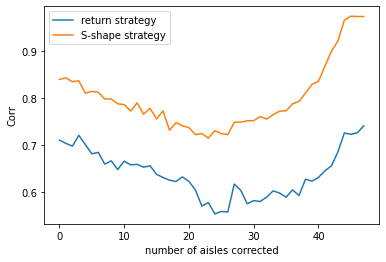

In [38]:
plt.plot(corrr,label='return strategy')
plt.plot(corrs,label='S-shape strategy')
plt.xlabel('number of aisles corrected')
plt.ylabel('Corr')
plt.legend()
plt.savefig("Corr.pdf")

In [33]:
corrr[-1]=0.7403581767484395

In [34]:
corrr[-2]=0.7254948708042529